In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!ls

Bandit_Analysis.ipynb
Bandit_experiment.ipynb
base_analysis.ipynb
cfg.py
data.py
eGreedyMAB_3000_300_BernoulliArm_0.5_Naive_results.pkl
eGreedyMAB_3000_300_BernoulliArm_0.5_Optimistic_results.pkl
eGreedyMAB_3000_300_BernoulliArm_1.0_Naive_results.pkl
eGreedyMAB_3000_300_BernoulliArm_1.0_Optimistic_results.pkl
eGreedyMAB_3000_300_GaussianArm_0.5_Naive_results.pkl
eGreedyMAB_3000_300_GaussianArm_0.5_Optimistic_results.pkl
eGreedyMAB_3000_300_GaussianArm_1.0_Naive_results.pkl
eGreedyMAB_3000_300_GaussianArm_1.0_Optimistic_results.pkl
linucb.py
mab.py
main.py
__pycache__
run.sh


In [3]:
def process(df):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    result = df[['epsilon', 'step', 'reward', 'chosen_optimal']].groupby(by=['epsilon', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, figsize=(12, 8)):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    for item in dfs:
        plt.plot(item[column], label=f"eps={item['epsilon'].iloc[0]}")
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

# Naive approach

## alpha = 1

In [5]:
with open("./eGreedyMAB_3000_300_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_3000_300_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
bern_results_naive_1 = []
for df in tqdm(bernoulli):
    bern_results_naive_1.append(process(df))
    
gaus_results_naive_1 = []
for df in tqdm(gaussian):
    gaus_results_naive_1.append(process(df))

100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


In [7]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results_naive_1[0].head())
print()
display(bern_results_naive_1[0].tail())
print()

print("egreedy")
display(bern_results_naive_1[1].head())
print()
display(bern_results_naive_1[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.594000,0.137000
1,0.0,1,0.662667,0.185667
2,0.0,2,0.695667,0.202000
3,0.0,3,0.695333,0.212333
4,0.0,4,0.702333,0.215000


,epsilon,step,reward,chosen_optimal
295,0.0,295,0.717667,0.216333
296,0.0,296,0.704333,0.216333
297,0.0,297,0.714000,0.216333
298,0.0,298,0.708333,0.216333
299,0.0,299,0.717000,0.216333



egreedy


,epsilon,step,reward,chosen_optimal
0,0.001,0,0.580000,0.128667
1,0.001,1,0.659000,0.177667
2,0.001,2,0.681333,0.195333
3,0.001,3,0.703000,0.201667
4,0.001,4,0.717667,0.205667


,epsilon,step,reward,chosen_optimal
295,0.001,295,0.728333,0.232667
296,0.001,296,0.737667,0.233000
297,0.001,297,0.723333,0.233000
298,0.001,298,0.728667,0.233000
299,0.001,299,0.718000,0.232667


In [8]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results_naive_1[0].head())
print()
display(gaus_results_naive_1[0].tail())
print()

print("egreedy")
display(gaus_results_naive_1[1].head())
print()
display(gaus_results_naive_1[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,5.380796,0.125333
1,0.0,1,5.821142,0.135000
2,0.0,2,5.977491,0.139333
3,0.0,3,6.089036,0.142000
4,0.0,4,6.225313,0.145667


,epsilon,step,reward,chosen_optimal
295,0.0,295,8.073040,0.203
296,0.0,296,8.078233,0.203
297,0.0,297,8.080090,0.203
298,0.0,298,8.066893,0.203
299,0.0,299,8.056181,0.203



egreedy


,epsilon,step,reward,chosen_optimal
0,0.082,0,5.359769,0.123333
1,0.082,1,5.806570,0.135667
2,0.082,2,6.024874,0.145667
3,0.082,3,6.244119,0.157667
4,0.082,4,6.523662,0.171333


,epsilon,step,reward,chosen_optimal
295,0.082,295,9.169181,0.351667
296,0.082,296,9.208667,0.352667
297,0.082,297,9.048254,0.349667
298,0.082,298,9.138143,0.355667
299,0.082,299,9.083204,0.349000


### Optimal Action %

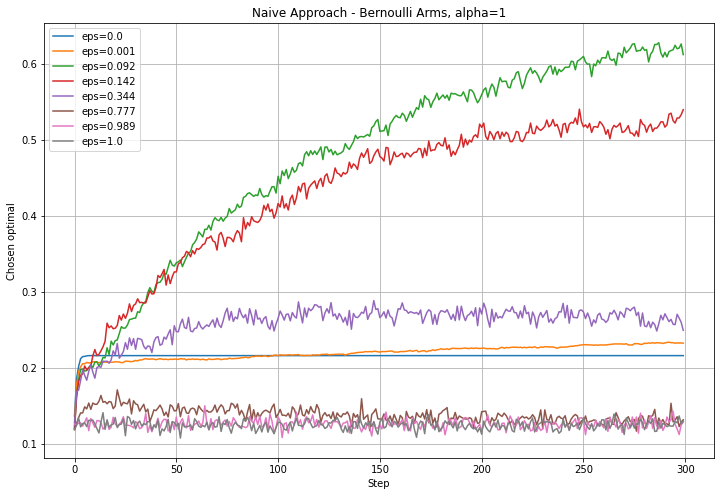

In [9]:
plot_results(bern_results_naive_1, column='chosen_optimal', title="Naive Approach - Bernoulli Arms, alpha=1")

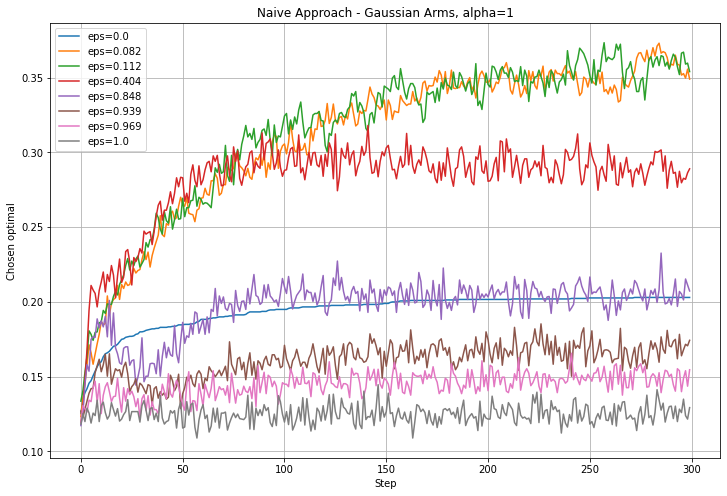

In [10]:
plot_results(gaus_results_naive_1, column='chosen_optimal', title="Naive Approach - Gaussian Arms, alpha=1")

### Average Reward

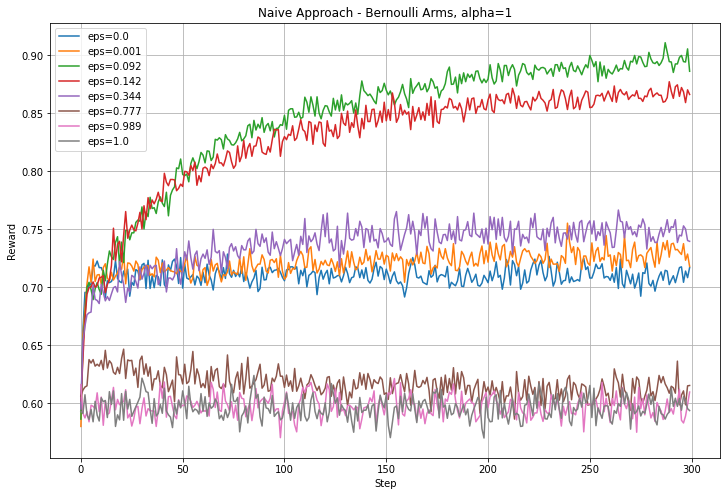

In [11]:
plot_results(bern_results_naive_1, column='reward', title="Naive Approach - Bernoulli Arms, alpha=1")

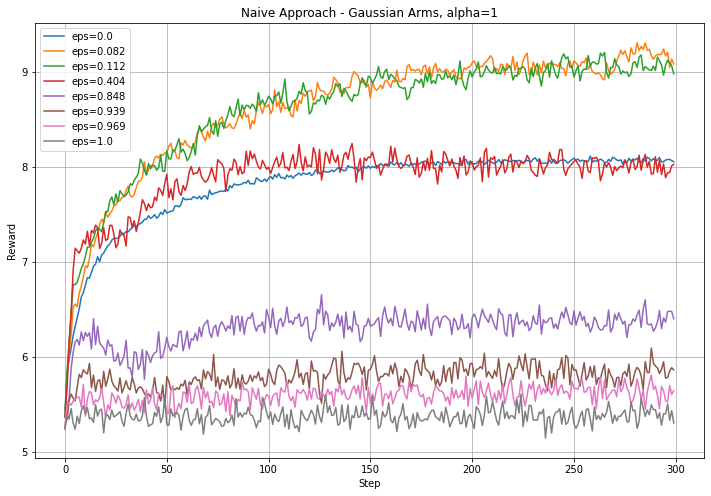

In [12]:
plot_results(gaus_results_naive_1, column='reward', title="Naive Approach - Gaussian Arms, alpha=1")

## alpha=0.5

In [13]:
with open("./eGreedyMAB_3000_300_BernoulliArm_0.5_Naive_results.pkl", 'rb') as f:
    bernoulli_naive_half = pickle.load(f)
    
with open("./eGreedyMAB_3000_300_GaussianArm_0.5_Naive_results.pkl", 'rb') as f:
    gaussian_naive_half = pickle.load(f)

In [14]:
bern_results_naive_half = []
for df in tqdm(bernoulli_naive_half):
    bern_results_naive_half.append(process(df))
    
gaus_results_naive_half = []
for df in tqdm(gaussian_naive_half):
    gaus_results_naive_half.append(process(df))

100%|██████████| 8/8 [00:25<00:00,  3.16s/it]


In [15]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results_naive_half[0].head())
print()
display(bern_results_naive_half[0].tail())
print()

print("egreedy")
display(bern_results_naive_half[1].head())
print()
display(bern_results_naive_half[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.533667,0.136000
1,0.0,1,0.611333,0.191000
2,0.0,2,0.660333,0.219667
3,0.0,3,0.653333,0.235667
4,0.0,4,0.682000,0.241000


,epsilon,step,reward,chosen_optimal
295,0.0,295,0.672667,0.246
296,0.0,296,0.689333,0.246
297,0.0,297,0.692667,0.246
298,0.0,298,0.688000,0.246
299,0.0,299,0.691333,0.246



egreedy


,epsilon,step,reward,chosen_optimal
0,0.203,0,0.533000,0.121333
1,0.203,1,0.581333,0.165333
2,0.203,2,0.639000,0.193333
3,0.203,3,0.651667,0.210333
4,0.203,4,0.654667,0.215667


,epsilon,step,reward,chosen_optimal
295,0.203,295,0.680000,0.237333
296,0.203,296,0.685000,0.237333
297,0.203,297,0.670000,0.237333
298,0.203,298,0.683667,0.237333
299,0.203,299,0.684667,0.237333


In [16]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results_naive_half[0].head())
print()
display(gaus_results_naive_half[0].tail())
print()

print("egreedy")
display(gaus_results_naive_half[1].head())
print()
display(gaus_results_naive_half[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,8.068635,0.120667
1,0.0,1,8.196847,0.123333
2,0.0,2,8.179045,0.123667
3,0.0,3,8.191148,0.124000
4,0.0,4,8.246549,0.124000


,epsilon,step,reward,chosen_optimal
295,0.0,295,8.956050,0.136667
296,0.0,296,8.954544,0.136667
297,0.0,297,8.943666,0.136667
298,0.0,298,8.955385,0.136667
299,0.0,299,8.952356,0.136667



egreedy


,epsilon,step,reward,chosen_optimal
0,0.172,0,8.057108,0.123667
1,0.172,1,8.156455,0.124333
2,0.172,2,8.440482,0.134667
3,0.172,3,8.542329,0.139333
4,0.172,4,8.504403,0.132667


,epsilon,step,reward,chosen_optimal
295,0.172,295,9.088107,0.141333
296,0.172,296,9.080075,0.142333
297,0.172,297,9.065947,0.141000
298,0.172,298,9.031153,0.141000
299,0.172,299,9.074129,0.141333


### Optimal action %

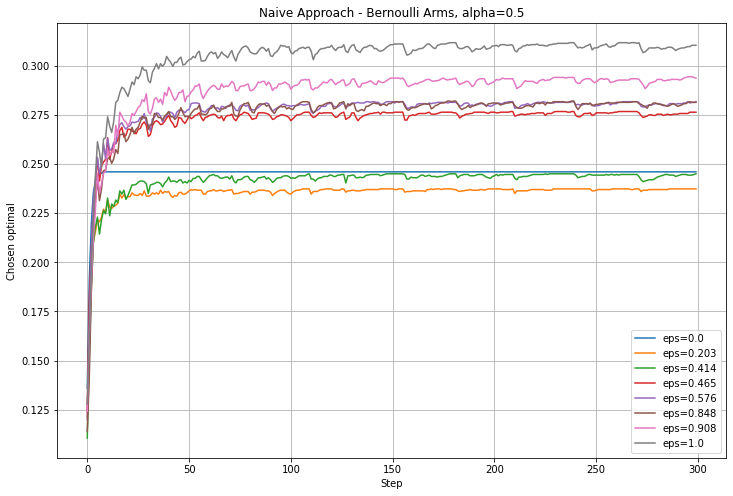

In [17]:
plot_results(bern_results_naive_half, column='chosen_optimal', title="Naive Approach - Bernoulli Arms, alpha=0.5")

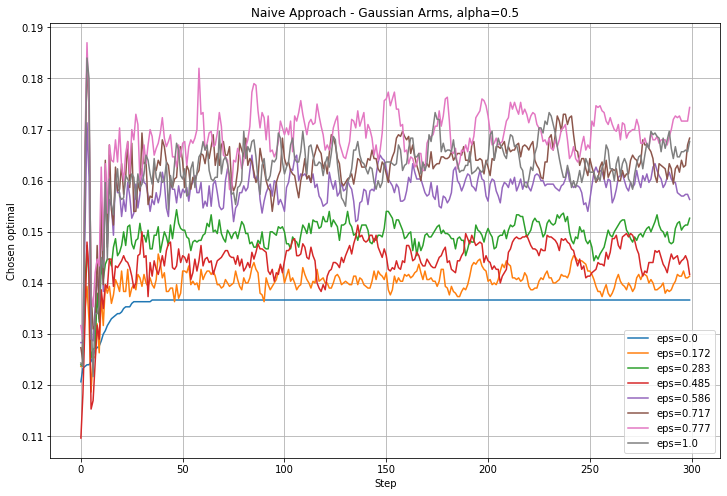

In [18]:
plot_results(gaus_results_naive_half, column='chosen_optimal', title="Naive Approach - Gaussian Arms, alpha=0.5")

### Average Reward

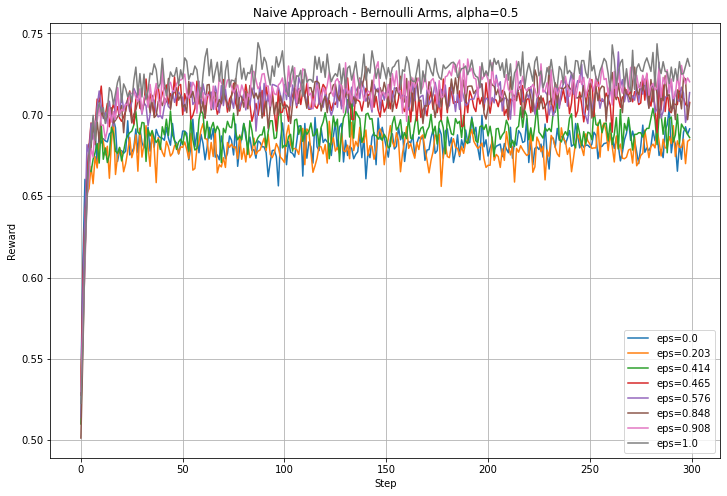

In [19]:
plot_results(bern_results_naive_half, column='reward', title="Naive Approach - Bernoulli Arms, alpha=0.5")

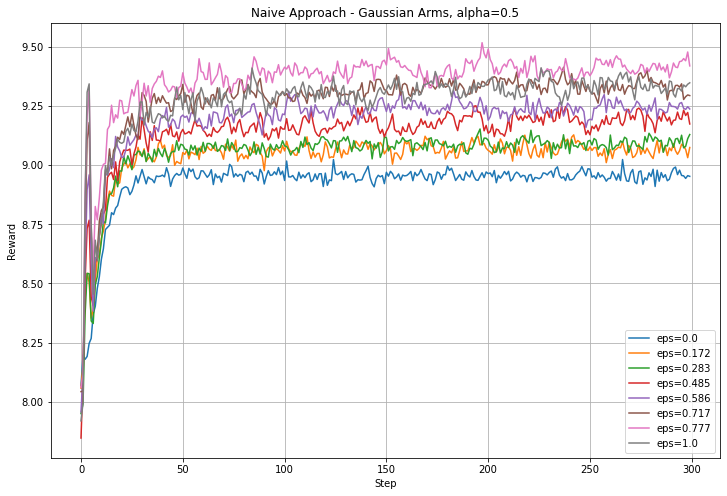

In [20]:
plot_results(gaus_results_naive_half, column='reward', title="Naive Approach - Gaussian Arms, alpha=0.5")

# Optimistic Approach

## alpha=1

In [21]:
with open("./eGreedyMAB_3000_300_BernoulliArm_1.0_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_1 = pickle.load(f)
    
with open("./eGreedyMAB_3000_300_GaussianArm_1.0_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_1 = pickle.load(f)

In [22]:
display(bernoulli_opt_1[0].head())
print()
display(bernoulli_opt_1[0].tail())

,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,1,7,0.0
1,0.0,0,1,5,7,0.0
2,0.0,0,2,0,7,0.0
3,0.0,0,3,0,7,0.0
4,0.0,0,4,4,7,1.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
899995,0.0,2999,295,4,7,1.0
899996,0.0,2999,296,4,7,0.0
899997,0.0,2999,297,4,7,0.0
899998,0.0,2999,298,6,7,0.0
899999,0.0,2999,299,5,7,1.0


In [23]:
bern_results_opt_1 = []
for df in tqdm(bernoulli_opt_1):
    bern_results_opt_1.append(process(df))
    
gaus_results_opt_1 = []
for df in tqdm(gaussian_opt_1):
    gaus_results_opt_1.append(process(df))

100%|██████████| 8/8 [00:26<00:00,  3.25s/it]


In [24]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results_opt_1[0].head())
print()
display(bern_results_opt_1[0].tail())
print()

print("egreedy")
display(bern_results_opt_1[1].head())
print()
display(bern_results_opt_1[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.460333,0.126667
1,0.0,1,0.517667,0.184667
2,0.0,2,0.486333,0.164000
3,0.0,3,0.484333,0.167333
4,0.0,4,0.471333,0.135000


,epsilon,step,reward,chosen_optimal
295,0.0,295,0.761667,0.589333
296,0.0,296,0.749333,0.592000
297,0.0,297,0.751333,0.591667
298,0.0,298,0.751000,0.587667
299,0.0,299,0.760000,0.585333



egreedy


,epsilon,step,reward,chosen_optimal
0,0.001,0,0.453333,0.123333
1,0.001,1,0.533333,0.180000
2,0.001,2,0.493333,0.151333
3,0.001,3,0.500000,0.154000
4,0.001,4,0.473000,0.141667


,epsilon,step,reward,chosen_optimal
295,0.001,295,0.755000,0.579000
296,0.001,296,0.760667,0.570000
297,0.001,297,0.768000,0.572667
298,0.001,298,0.755333,0.572000
299,0.001,299,0.757667,0.572333


### Optimal action %

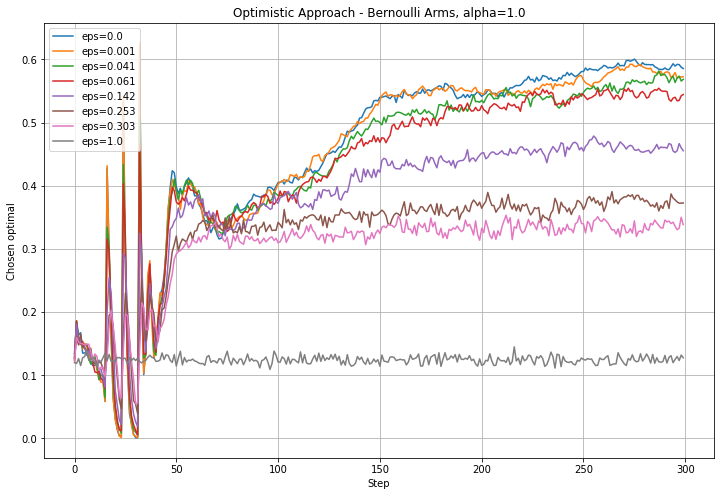

In [25]:
plot_results(bern_results_opt_1, column='chosen_optimal', title="Optimistic Approach - Bernoulli Arms, alpha=1.0")

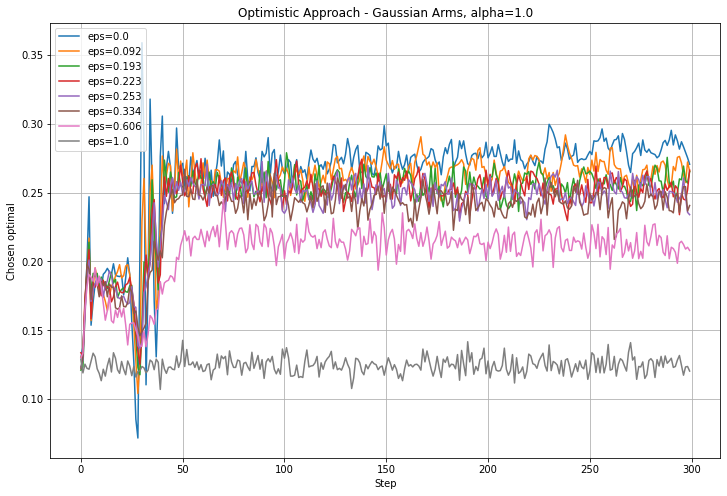

In [26]:
plot_results(gaus_results_opt_1, column='chosen_optimal', title="Optimistic Approach - Gaussian Arms, alpha=1.0")

### Average Reward

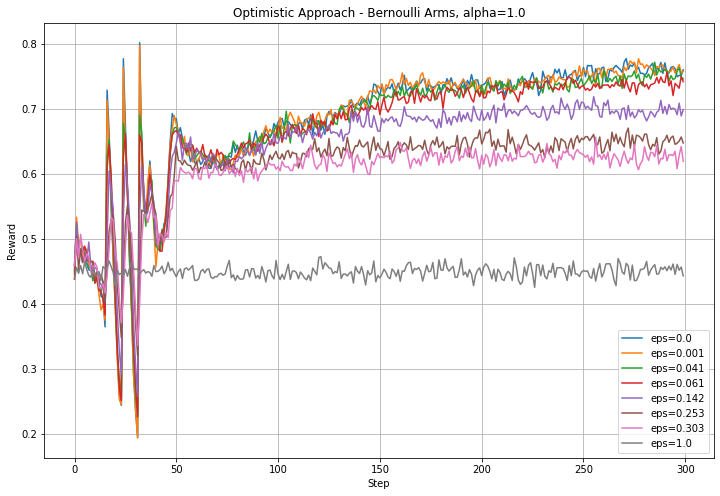

In [27]:
plot_results(bern_results_opt_1, column='reward', title="Optimistic Approach - Bernoulli Arms, alpha=1.0")

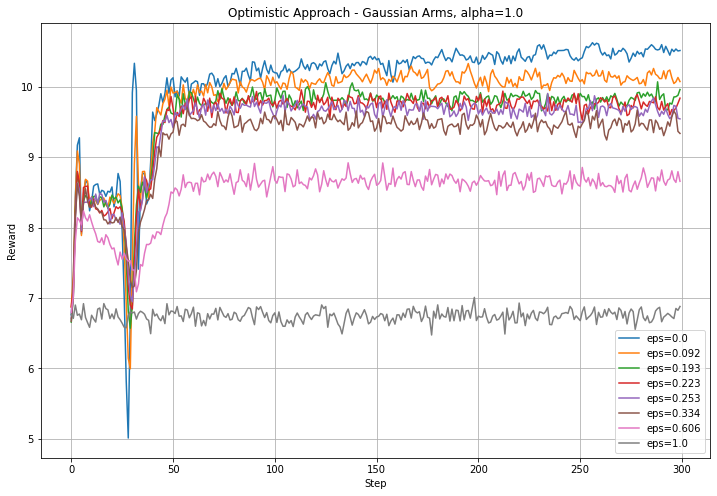

In [28]:
plot_results(gaus_results_opt_1, column='reward', title="Optimistic Approach - Gaussian Arms, alpha=1.0")

## alpha=0.5

In [29]:
with open("./eGreedyMAB_3000_300_BernoulliArm_0.5_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_half = pickle.load(f)
    
with open("./eGreedyMAB_3000_300_GaussianArm_0.5_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_half = pickle.load(f)

In [30]:
bern_results_opt_half = []
for df in tqdm(bernoulli_opt_half):
    bern_results_opt_half.append(process(df))
    
gaus_results_opt_half = []
for df in tqdm(gaussian_opt_half):
    gaus_results_opt_half.append(process(df))

100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


### Optimal action %

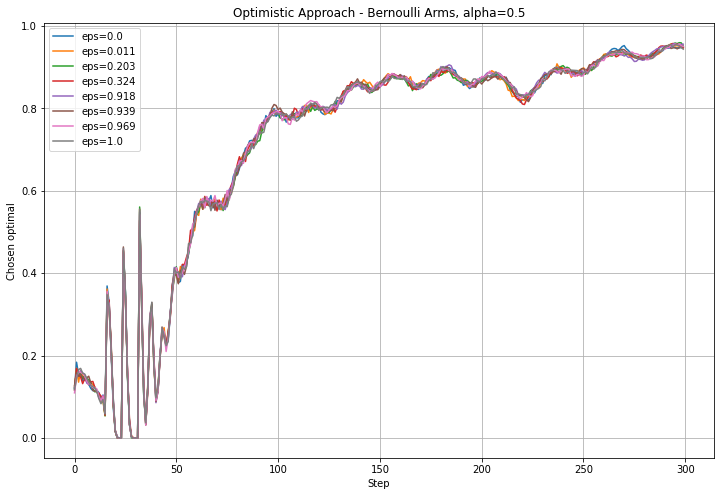

In [31]:
plot_results(bern_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach - Bernoulli Arms, alpha=0.5")

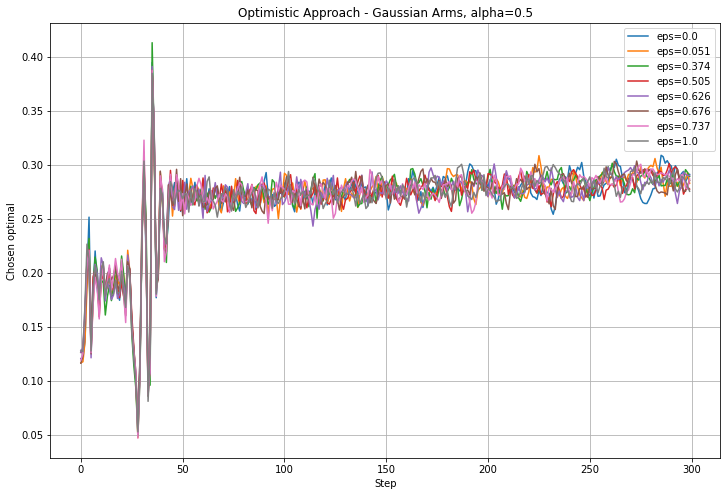

In [32]:
plot_results(gaus_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach - Gaussian Arms, alpha=0.5")

### Average Reward

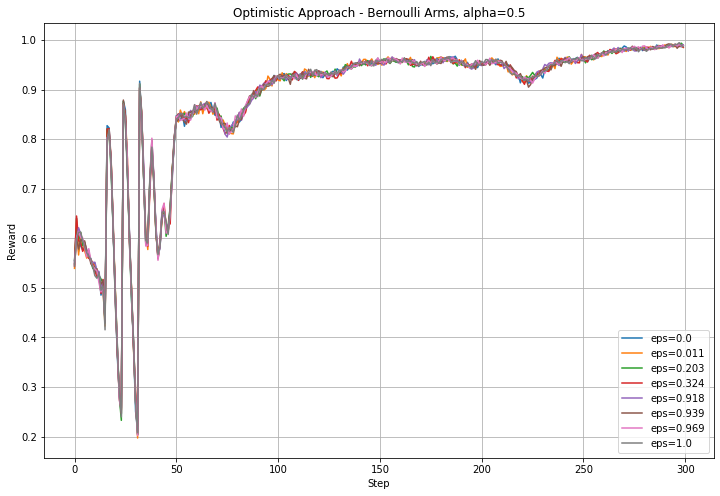

In [33]:
plot_results(bern_results_opt_half, column='reward', 
             title="Optimistic Approach - Bernoulli Arms, alpha=0.5")

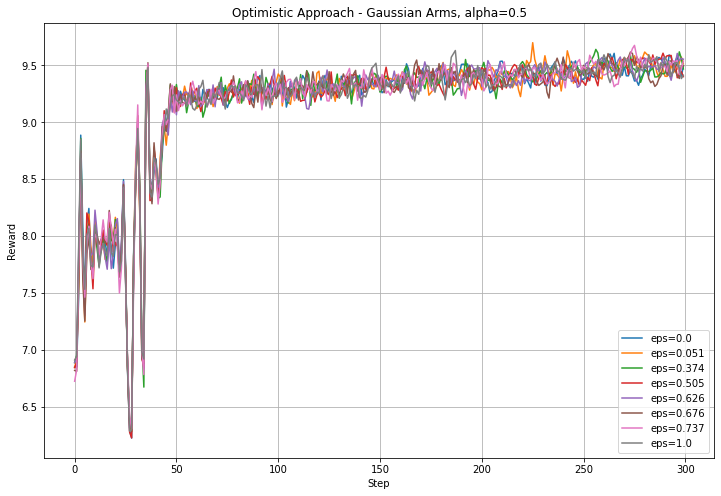

In [34]:
plot_results(gaus_results_opt_half, column='reward', 
             title="Optimistic Approach - Gaussian Arms, alpha=0.5")

# Comparison - Naive vs Optimistic

## Bernoulli alpha=1

### Optimal action %

In [35]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.092


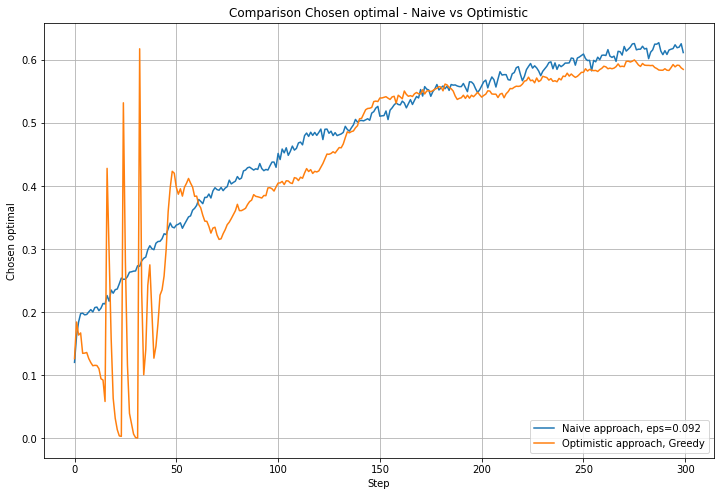

In [36]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [37]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.092


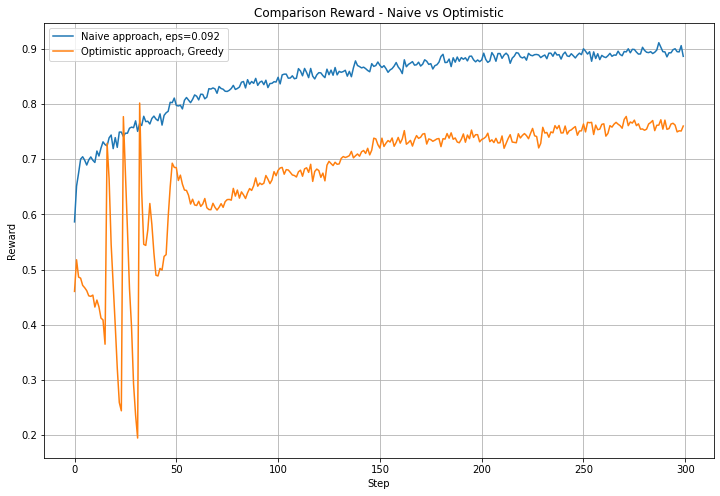

In [38]:
column = 'reward'
best_epsilon = bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Bernoulli alpha=0.5

### Optimal action %

In [39]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


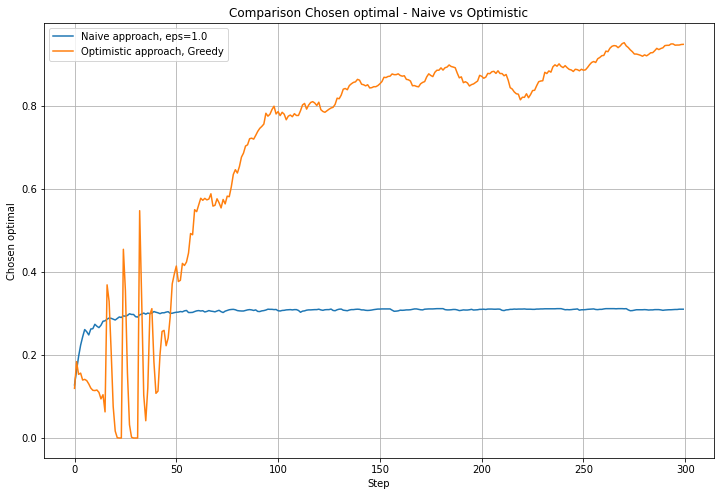

In [40]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [41]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


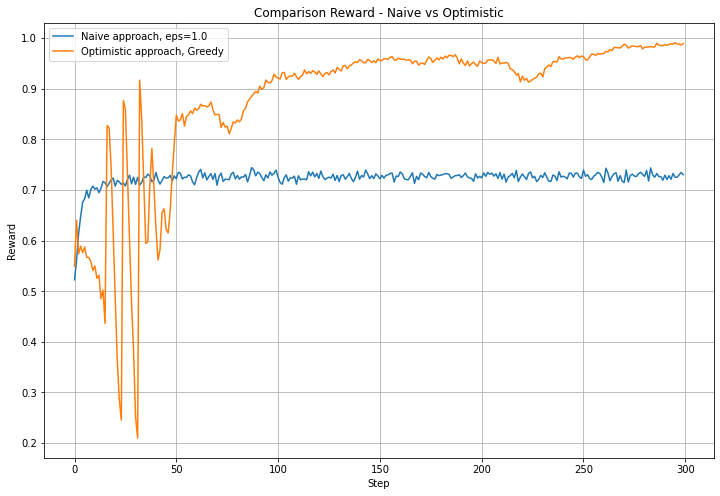

In [42]:
column = 'reward'
best_epsilon = bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=1

### Optimal action %

In [43]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.112


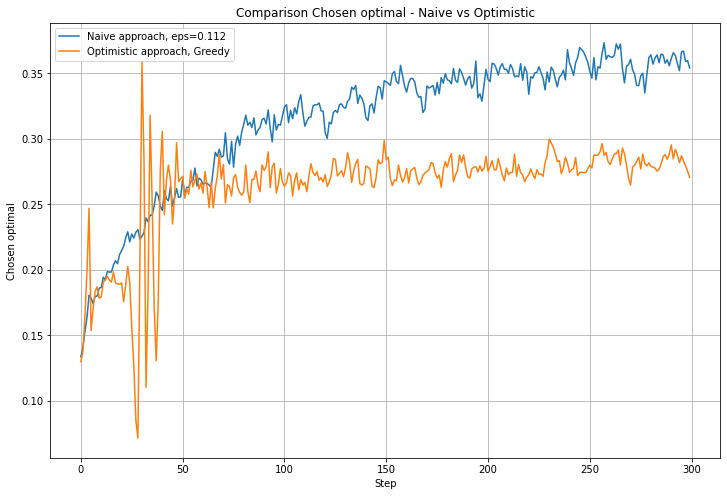

In [44]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [45]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.082


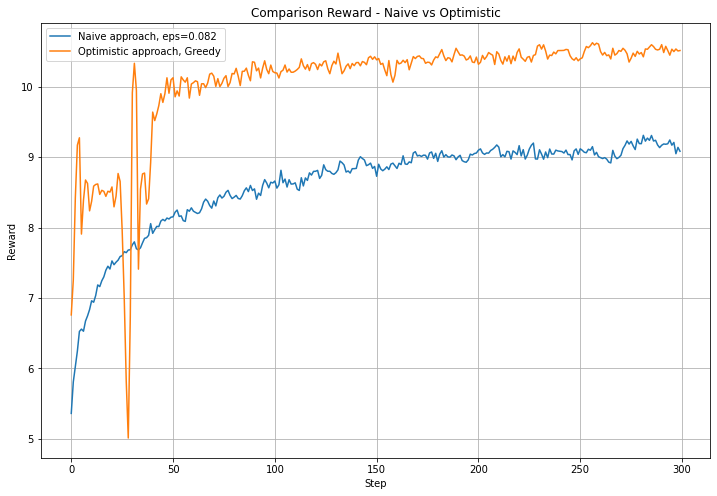

In [46]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Bernoulli alpha=0.5

### Optimal action %

In [47]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.777


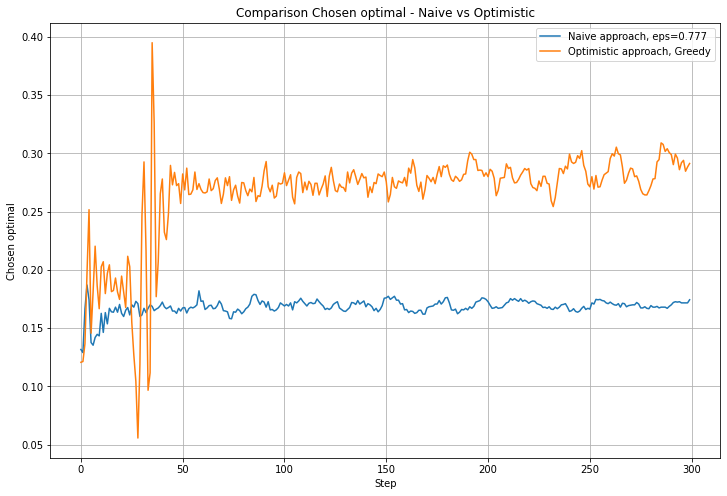

In [48]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [49]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.777


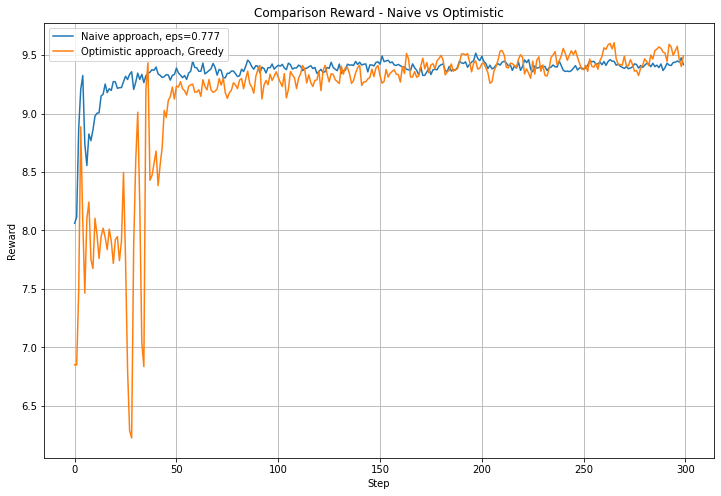

In [50]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()